In [1]:
import cv2
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
from PIL import Image, ImageGrab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#get CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
#define class names
### this shouldn't be hard coded but i dont want to reload the data...
class_names = ['five', 'four', 'one', 'three', 'two']

In [4]:
# load the model from the current working directory
cwd = os.getcwd()
model_conv = torchvision.models.resnet18()
num_fts = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_fts, 5)
model_conv.load_state_dict(torch.load(os.path.join(cwd, "modelParams.pth")))
model_conv.to(device)
model_conv.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<class 'PIL.JpegImagePlugin.JpegImageFile'>


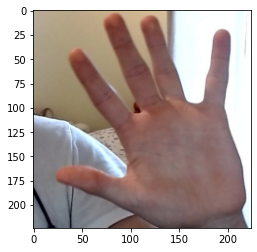

five


In [5]:
#quick test to see if the loaded model is working
im = Image.open("D:\Python Code\SignLanguageCalculator\data\\test\\five\WIN_20201229_12_04_39_Pro (2).jpg")
print(type(im))
resize = transforms.Resize((224, 224))
trans = transforms.ToTensor()
norm = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
im = norm(trans(resize(im)))


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    
imshow(im)
im = im.to(device)
im = im.unsqueeze(0)
_, preds = torch.max(model_conv(im), 1)
print(class_names[preds])

<class 'numpy.ndarray'>


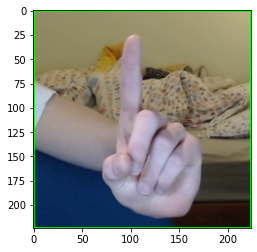

one
<class 'numpy.ndarray'>


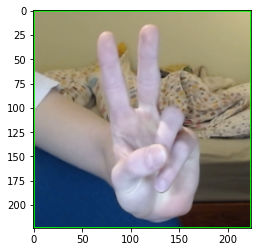

one
<class 'numpy.ndarray'>


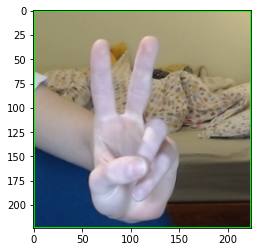

one
<class 'numpy.ndarray'>


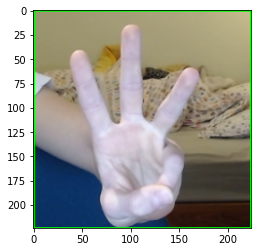

three
<class 'numpy.ndarray'>


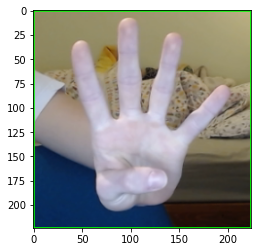

four
<class 'numpy.ndarray'>


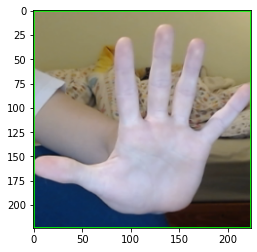

four
<class 'numpy.ndarray'>


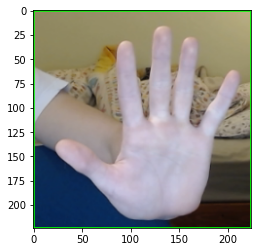

four
<class 'numpy.ndarray'>


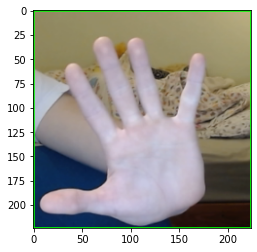

four


In [ ]:
#create video camera object and get input from camera
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False
    
while True:
    #cv2.imshow("preview", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    cv2.rectangle(frame, (150, 150), (400, 400), (0, 255, 0), 2)
    cv2.imshow("preview", frame)
    
    if key == ord('y'):
        frame = frame[150:400, 150:400]
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        print(type(frame))
        img = Image.fromarray(np.uint8(frame)).convert('RGB')
        img = norm(trans(resize(img)))
        imshow(img)
        img = img.to(device)
        img = img.unsqueeze(0)
        _, preds = torch.max(model_conv(img), 1)
        print(class_names[preds])
        
    if key == 27:
        break
        
vc.release()
cv2.destroyAllWindows()